In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = './data/images' # Change this, according to your images' directory path

18. Segmentation - GrabCut

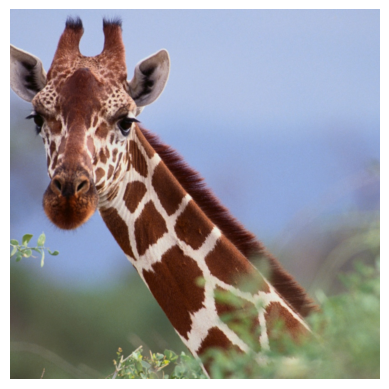

In [5]:
# Segment some color images using the GrabCut algorithm – cv.grabCut(). Try different initialization modes (see
# GrabCutModes): bounding rectangle or mask mode.

# Load the image
img = cv2.imread(os.path.join(imagesDir, 'giraffe.jpg'))
# If error reading the image
if img is None:
    print('Error reading image')
else:
    # Show the image
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

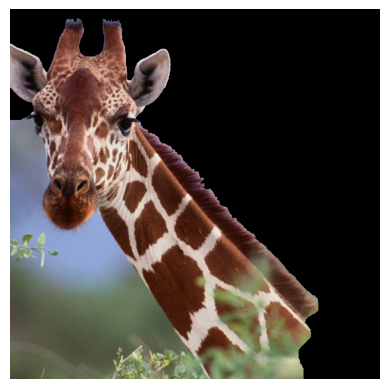

In [6]:
# Prepare the arguments for the grabCut Algorithm

# Create a mask that will contain the grabCut result mask (foreground and background)
mask = np.zeros(img.shape[:2], np.uint8)

# Create a background and foreground model
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

# Define the bounding rectangle
rect = (0, 0, 1000, 1200)

# Run the grabCut algorithm
numIter = 5
operMode = cv2.GC_INIT_WITH_RECT    # Use the bounding rectangle
cv2.grabCut(img, mask, rect, bgModel, fgModel, numIter, operMode)

# Create a mask with the results
# 0 - background, 1 - foreground, 2 - probable background, 3 - probable foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the image
resultImg = img * mask2[:, :, np.newaxis]

# Show the result
rgb_resultImg = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_resultImg)
plt.axis('off')
plt.show()

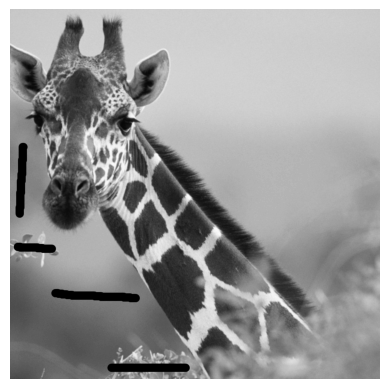

In [10]:
# We can see that the algorithm did a good job, but there are some errors. 
# We will mark the background area (bottom left) as background by opening the image in paint and using the brush tool
# To mark it as background (paint black). If we wanted to mark it as foreground, we would paint it white.

# Load the image as grayscale (to detect the black/white pixels)
newImgMask = cv2.imread(os.path.join(imagesDir, 'giraffe_marked.jpg'), cv2.IMREAD_GRAYSCALE)
# If error reading the image
if newImgMask is None:
    print('Error reading image')
else:
    # Show the image
    plt.imshow(newImgMask, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# Wherever the mask is marked black, we will mark it as background (change mask value to 0)
# Wherever the mask is marked white, we will mark it as foreground (change mask value to 1)
mask[newImgMask == 0] == 0
mask[newImgMask == 255] == 1

# Run the grabCut algorithm again with the new mask
operMode = cv2.GC_INIT_WITH_MASK    # Use the MASK mode (instead of the bounding rectangle) since we are improving the previous result
mask, bgModel, fgModel = cv2.grabCut(img, mask, None, bgModel, fgModel, 5, cv2.GC_INIT_WITH_MASK)

# Create a mask with the results
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the image
resultImg = img * mask[:, :, np.newaxis]

# Show the result
rgb_resultImg = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_resultImg)
plt.axis('off')
plt.show()